**Importing Required Libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder  , OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , ConfusionMatrixDisplay , classification_report
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as st
from mixed_naive_bayes import MixedNB
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_classif , f_oneway , f_classif , SelectKBest , chi2
from sklearn.preprocessing import FunctionTransformer , StandardScaler
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

**Importing Dataset**

In [5]:
df = pd.read_csv(r"C:\Users\User\Downloads\Placement_Data.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**Columns Overview:**
* Sl_no.: Candidate serial number
* Gender: Gender of the candidate
* Ssc_p: Percentage of marks in Secondary Education/ 10th
* ssc_b: Board of Secondary education - Central/Others
* Hsc_p:  Percentage of marks in Higher Secondary Education/ 12th
* hsc_b: Board of Higher Secondary Education - Central/Others
* hsc_s: Specialization in Higher Secondary Education/12th
* Degree_p:  Percentage of marks in Degree
* Degree_t: Undergraduation type/ Field of degree education
* workex: Any previous experience
* Etest_p: Employability test percentage
* specialisation: Post Graduation(MBA) specialization
* Mba_p: Percentage of marks in MBA
* Status: Candidate placed or not, Target variable
* Salary: If placed, what is the salary offered by the company to the candidate


## Data Preprocessing
### 1. Exploratory Data Analysis

**Correction of Features Names**

In [6]:
df = df.rename(columns={'sl_no':'Serial Number' , 'gender':'Gender' , 'ssc_p':'10th Percentage' , 'ssc_b':'10th Board', 'hsc_p':'12th Percentage' , 'hsc_b':'12th Board' , 'hsc_s':'12th Specialization' , 'degree_p':'Degree Percentage' , 'degree_t':'Degree Specilization' , 'workex':'Work Exp' , 'etest_p':'Emp Test Percentage' , 'specialization':'Post Grad MBA Specialization' , 'mba_p':'MBA Percentage'})
df

,Serial Number,Gender,10th Percentage,10th Board,12th Percentage,12th Board,12th Specialization,Degree Percentage,Degree Specilization,Work Exp,Emp Test Percentage,specialisation,MBA Percentage,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


**Shape of Dataframe**

In [7]:
df.shape

(215, 15)

**Dataframe's Features**

In [8]:
df.columns

Index(['Serial Number', 'Gender', '10th Percentage', '10th Board',
       '12th Percentage', '12th Board', '12th Specialization',
       'Degree Percentage', 'Degree Specilization', 'Work Exp',
       'Emp Test Percentage', 'specialisation', 'MBA Percentage', 'status',
       'salary'],
      dtype='object')

**Dataframe info**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Serial Number         215 non-null    int64  
 1   Gender                215 non-null    object 
 2   10th Percentage       215 non-null    float64
 3   10th Board            215 non-null    object 
 4   12th Percentage       215 non-null    float64
 5   12th Board            215 non-null    object 
 6   12th Specialization   215 non-null    object 
 7   Degree Percentage     215 non-null    float64
 8   Degree Specilization  215 non-null    object 
 9   Work Exp              215 non-null    object 
 10  Emp Test Percentage   215 non-null    float64
 11  specialisation        215 non-null    object 
 12  MBA Percentage        215 non-null    float64
 13  status                215 non-null    object 
 14  salary                148 non-null    float64
dtypes: float64(6), int64(1)

**Duplicates Values**

In [10]:
df.duplicated().sum()

0

**Missing Values Identification**

In [11]:
df.isna().sum()

Serial Number            0
Gender                   0
10th Percentage          0
10th Board               0
12th Percentage          0
12th Board               0
12th Specialization      0
Degree Percentage        0
Degree Specilization     0
Work Exp                 0
Emp Test Percentage      0
specialisation           0
MBA Percentage           0
status                   0
salary                  67
dtype: int64

**There is 67 missing value in "Salary" column , missing value is more, removing the column will be more efficient, I will do that in Data cleaning.**

**Structural Errors**

In [12]:
for i in df.columns:
    print(i , df[i].unique())

Serial Number [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]
Gender ['M' 'F']
10th Percentage [67.   79.33 65.   56.   85.8  55.   46.   82.   73.   58.   69.6  47.
 77.   62

**Outliers Identification**

Serial Number             Axes(0.125,0.653529;0.227941x0.226471)
10th Percentage        Axes(0.398529,0.653529;0.227941x0.226471)
12th Percentage        Axes(0.672059,0.653529;0.227941x0.226471)
Degree Percentage         Axes(0.125,0.381765;0.227941x0.226471)
Emp Test Percentage    Axes(0.398529,0.381765;0.227941x0.226471)
MBA Percentage         Axes(0.672059,0.381765;0.227941x0.226471)
salary                        Axes(0.125,0.11;0.227941x0.226471)
dtype: object

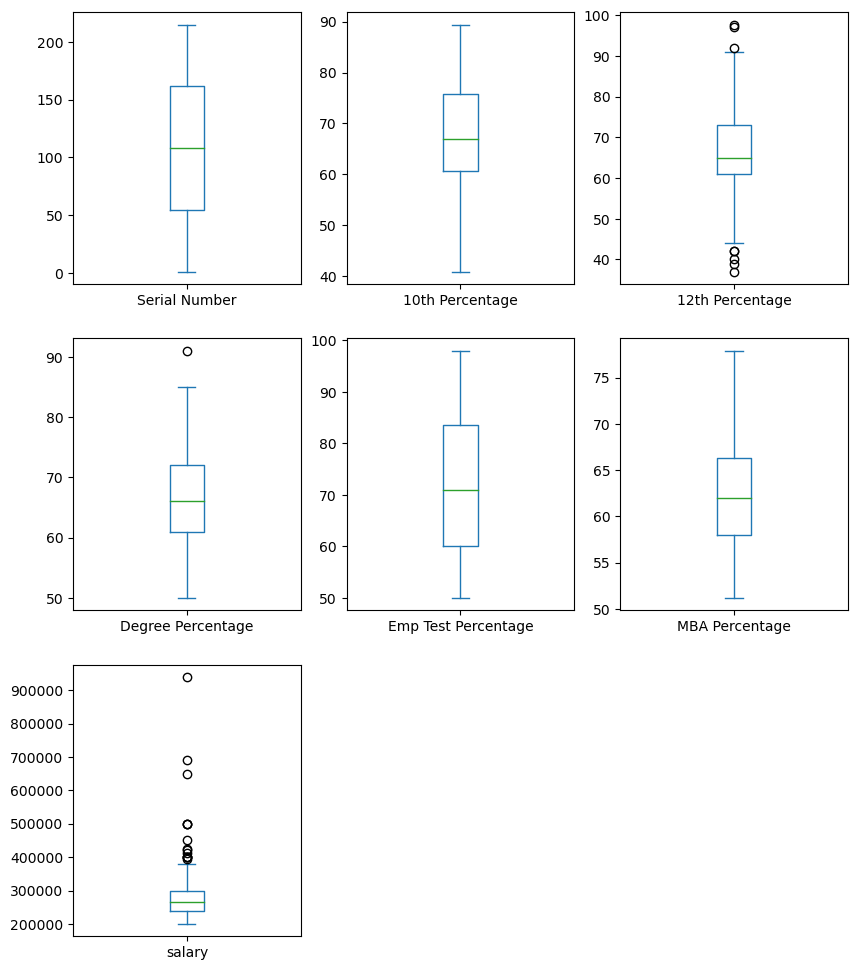

In [13]:
numeric_df = df.select_dtypes(exclude='object')
numeric_df.plot(kind = 'box' , subplots = True , layout = (3,3) , figsize=(10,12))

**There is no ouliers dataset except "salary",  I will treat these outliers in data cleaning after splitting the data.**

**Normally Distribution Identification**

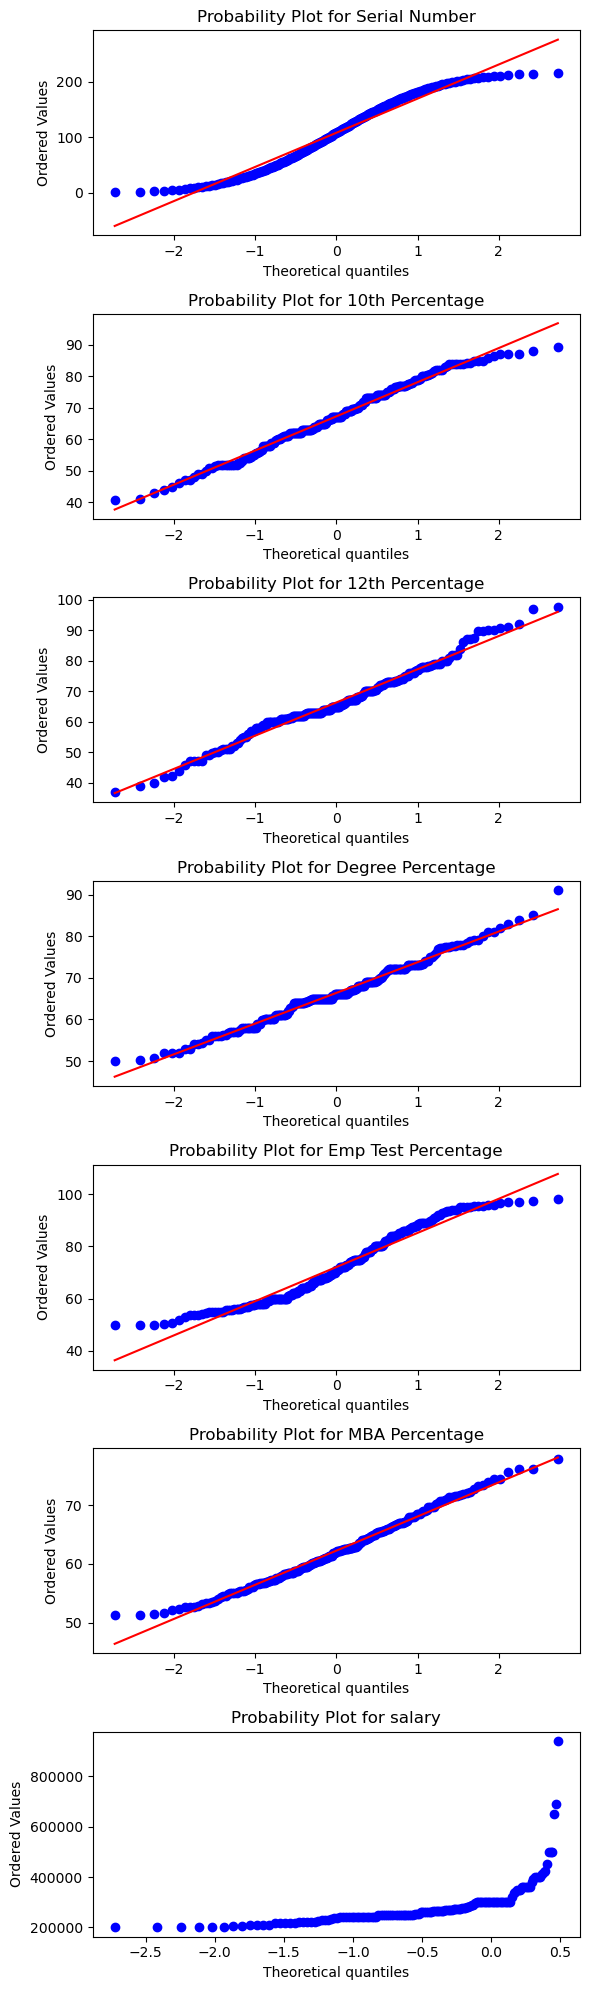

In [14]:
fig, axs = plt.subplots(7,1, figsize=(6,20))

axs = axs.flatten()

for i, col in enumerate(numeric_df):
    st.probplot(numeric_df[col], plot=axs[i])
    axs[i].set_title(f'Probability Plot for {col}')

plt.tight_layout()
plt.show()

**Data looks normally distributed except "Salary" column,  I will treat that in data cleaning.**

**Numeric Columns Distribution**

Serial Number


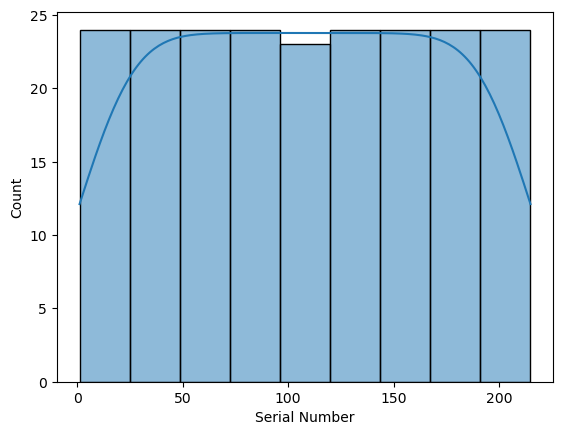

10th Percentage


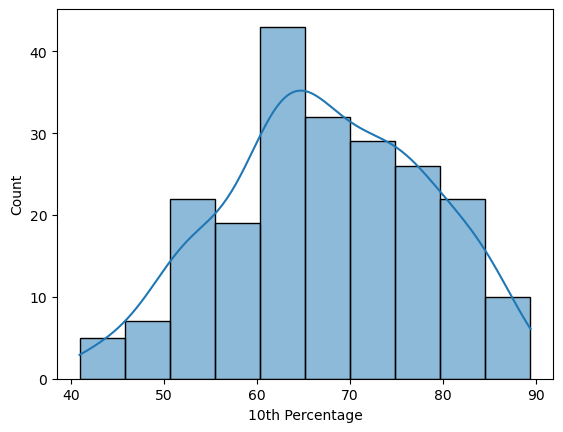

12th Percentage


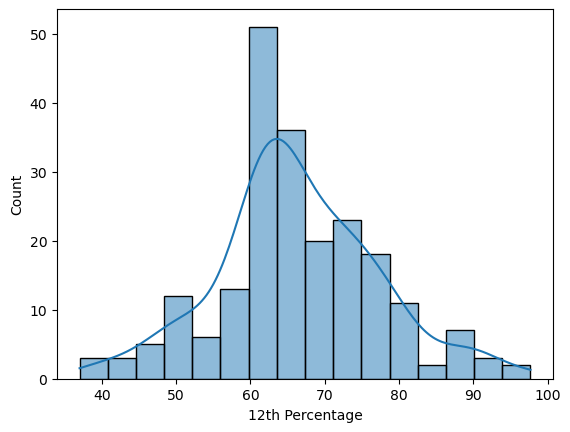

Degree Percentage


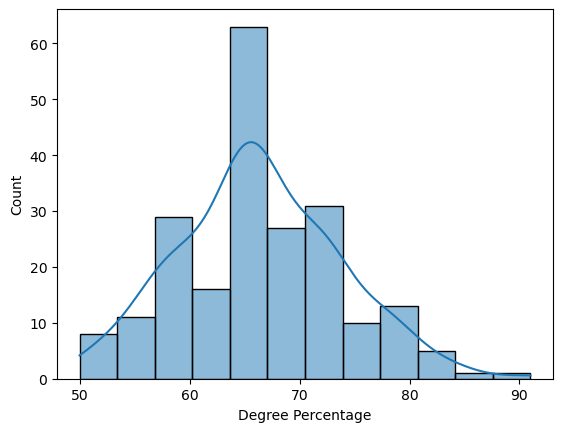

Emp Test Percentage


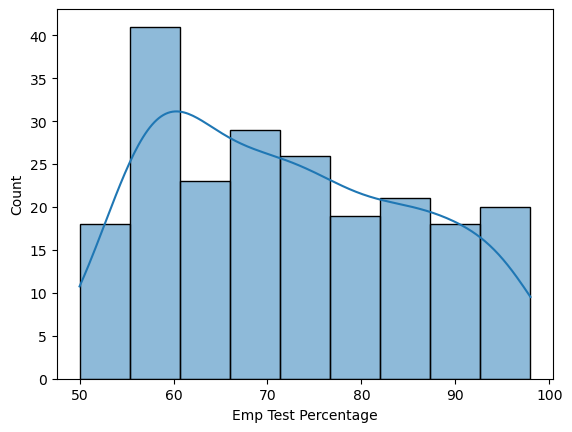

MBA Percentage


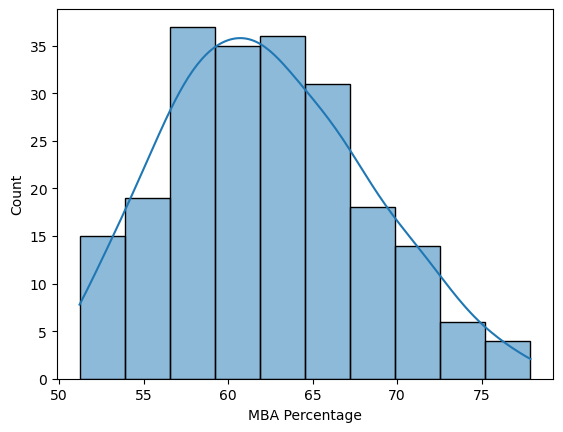

salary


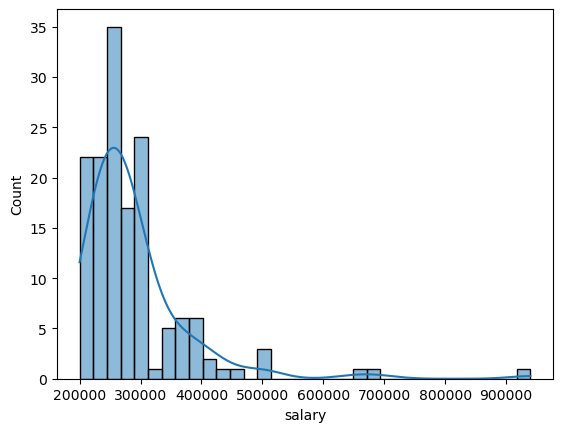

In [15]:
for i in df.select_dtypes(exclude='object').columns:
    print(i)
    sns.histplot(kde=True,data=df[i])
    plt.show()

**Categorical Features Distribution**

Gender


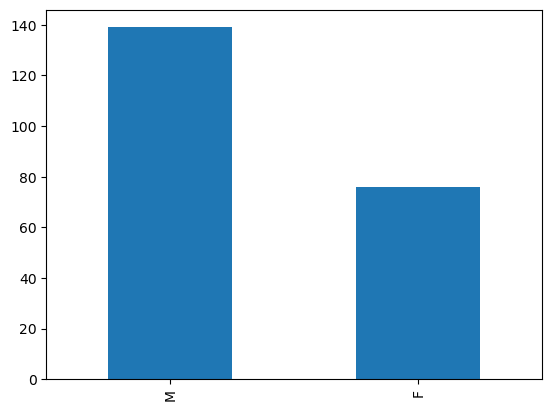

10th Board


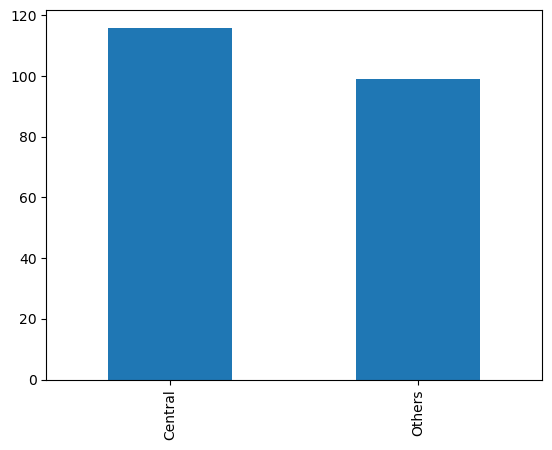

12th Board


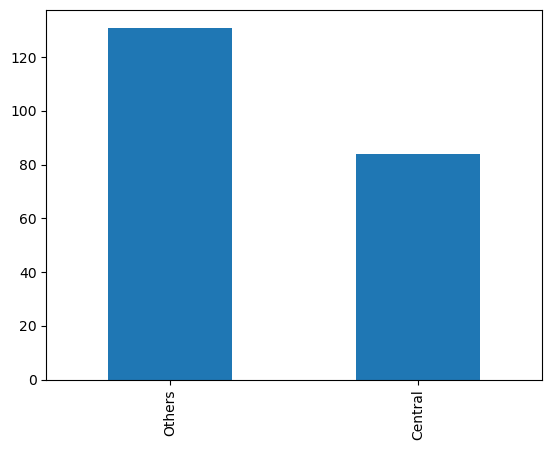

12th Specialization


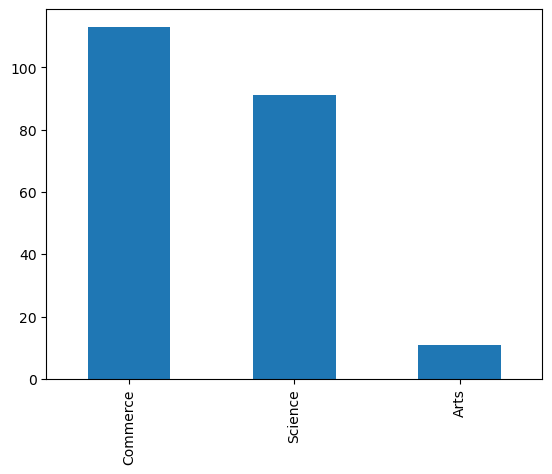

Degree Specilization


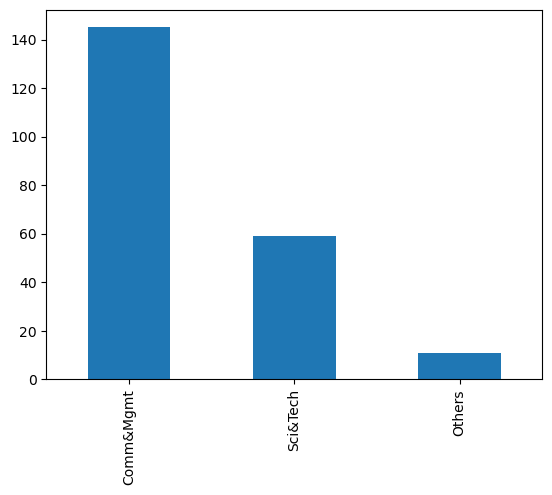

Work Exp


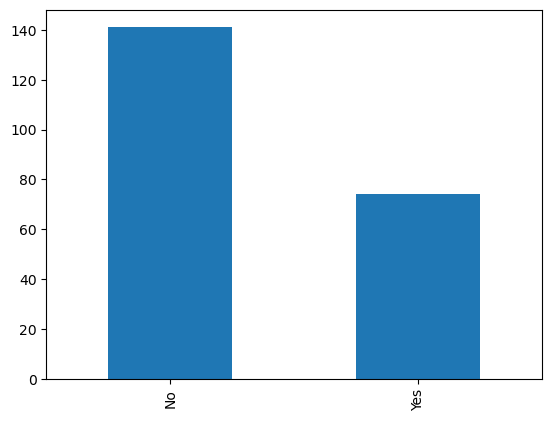

specialisation


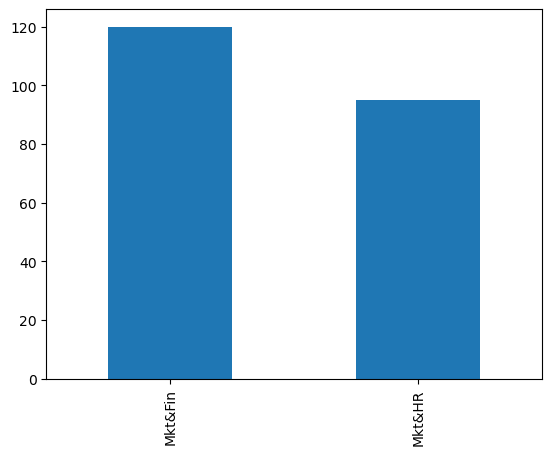

status


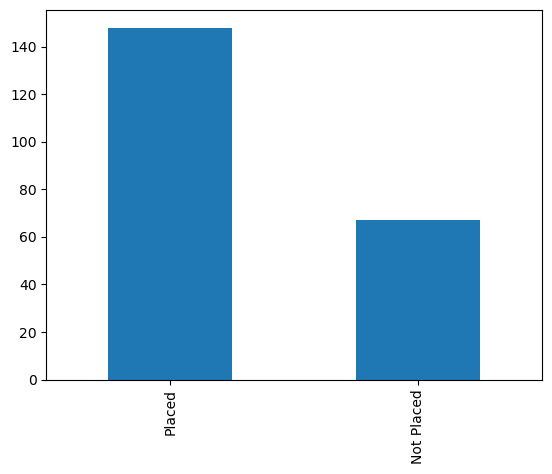

In [16]:
for i in df.select_dtypes(include='object').columns:
    print(i)
    df[i].value_counts().plot(kind='bar')
    plt.show()

In [17]:
df.select_dtypes(exclude='object').columns

Index(['Serial Number', '10th Percentage', '12th Percentage',
       'Degree Percentage', 'Emp Test Percentage', 'MBA Percentage', 'salary'],
      dtype='object')

<Axes: xlabel='10th Percentage', ylabel='12th Percentage'>

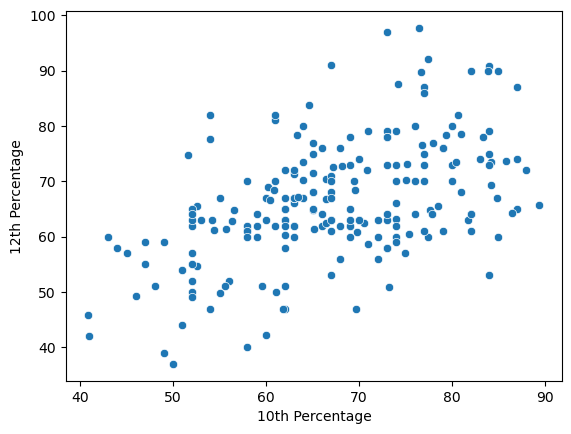

In [18]:
sns.scatterplot(data = df , x = '10th Percentage' , y = '12th Percentage')

<Axes: xlabel='Degree Percentage', ylabel='MBA Percentage'>

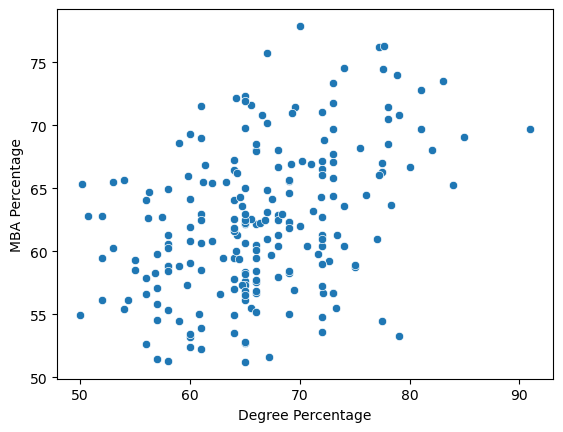

In [19]:
sns.scatterplot(data = df , x = 'Degree Percentage' , y = 'MBA Percentage')

<Axes: xlabel='MBA Percentage', ylabel='salary'>

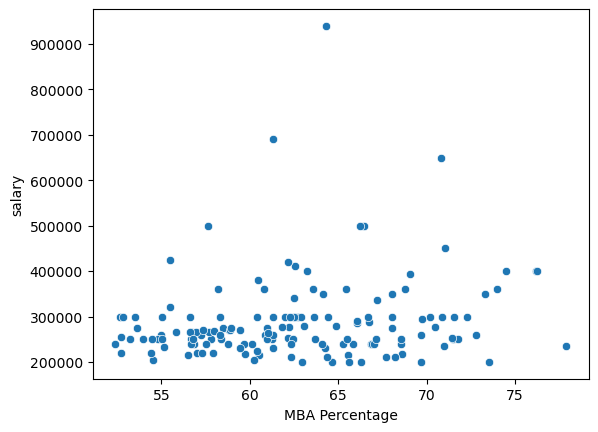

In [20]:
sns.scatterplot(data = df , x = 'MBA Percentage' , y = 'salary')

<Axes: xlabel='Emp Test Percentage', ylabel='salary'>

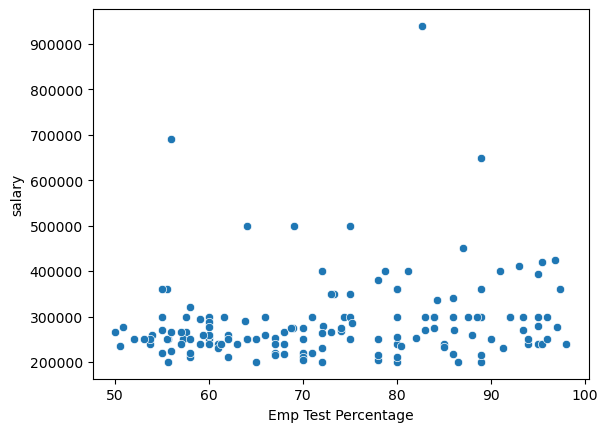

In [21]:
sns.scatterplot(data = df , x = 'Emp Test Percentage' , y = 'salary')

**I observe that there is no strong relationhips between numeric features.**

In [22]:
df

,Serial Number,Gender,10th Percentage,10th Board,12th Percentage,12th Board,12th Specialization,Degree Percentage,Degree Specilization,Work Exp,Emp Test Percentage,specialisation,MBA Percentage,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


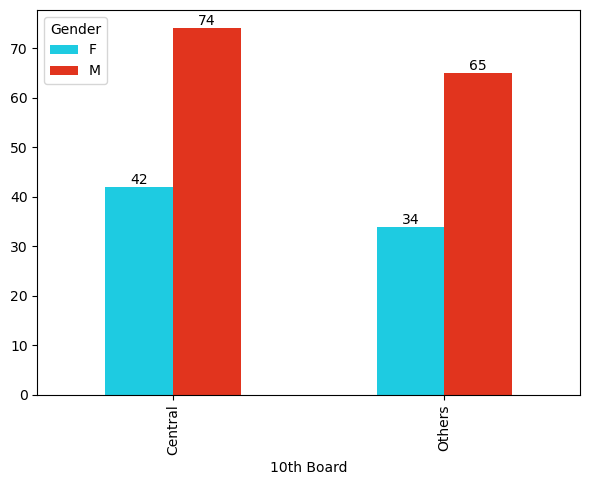

In [23]:
ax = pd.crosstab(df['10th Board'] , df['Gender']).plot(kind='bar' , color=('#1ECBE1','#E1341E') , figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

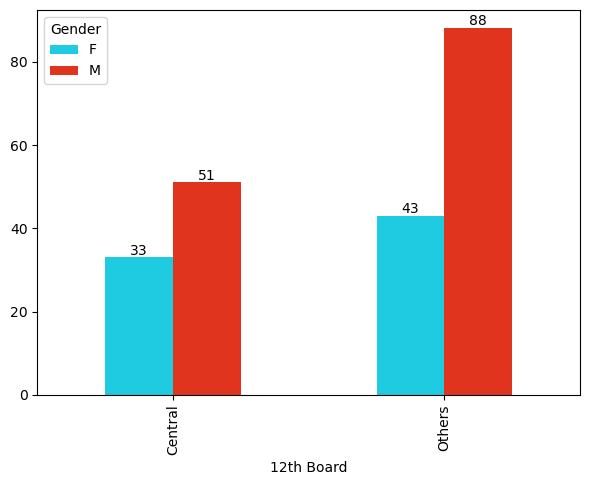

In [24]:
ax = pd.crosstab(df['12th Board'] , df['Gender']).plot(kind='bar' , color=('#1ECBE1','#E1341E') , figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

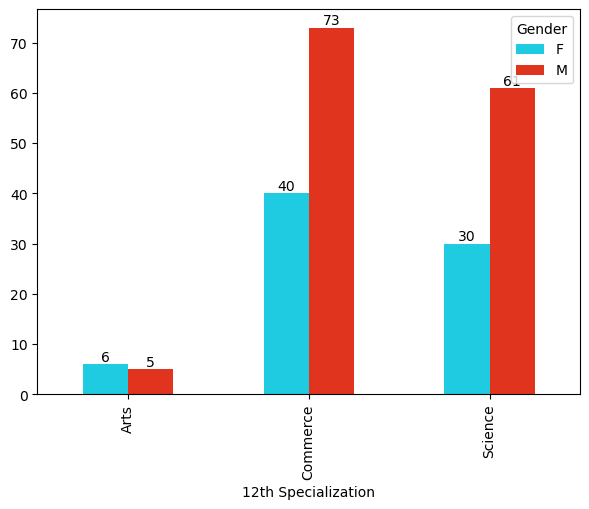

In [25]:
ax = pd.crosstab(df['12th Specialization'] , df['Gender']).plot(kind='bar' , color=('#1ECBE1','#E1341E') , figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

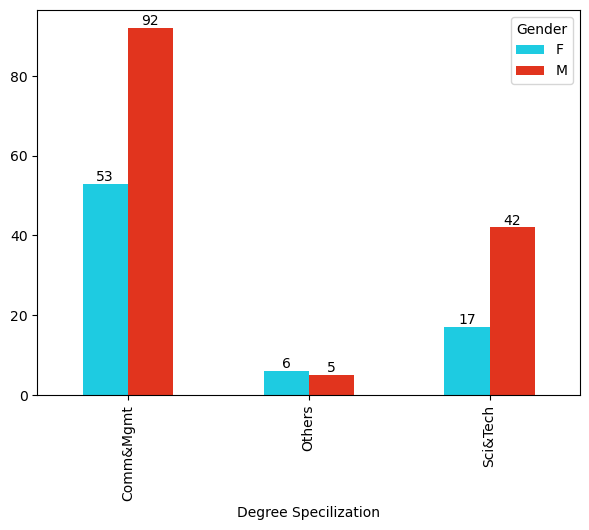

In [26]:
ax = pd.crosstab(df['Degree Specilization'] , df['Gender']).plot(kind='bar' , color=('#1ECBE1','#E1341E') , figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

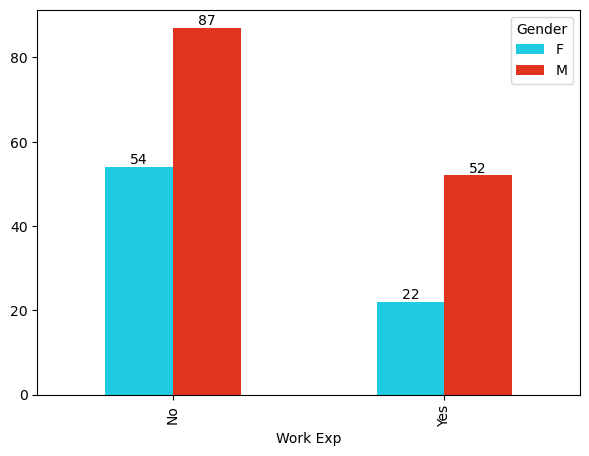

In [27]:
ax = pd.crosstab(df['Work Exp'] , df['Gender']).plot(kind='bar' , color=('#1ECBE1','#E1341E') , figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

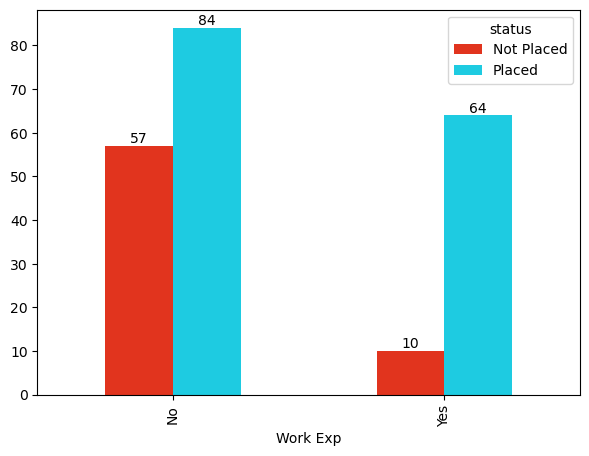

In [28]:
ax = pd.crosstab(df['Work Exp'] , df['status']).plot(kind='bar' , color=('#E1341E' , '#1ECBE1') , figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

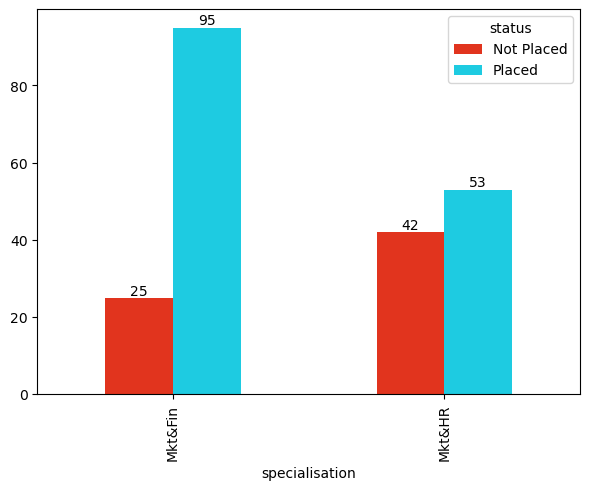

In [29]:
ax = pd.crosstab(df['specialisation'] , df['status']).plot(kind='bar' , color=('#E1341E' , '#1ECBE1') , figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

In [30]:
df.corr(numeric_only=True)

,Serial Number,10th Percentage,12th Percentage,Degree Percentage,Emp Test Percentage,MBA Percentage,salary
Serial Number,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
10th Percentage,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
12th Percentage,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
Degree Percentage,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
Emp Test Percentage,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
MBA Percentage,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


<Axes: >

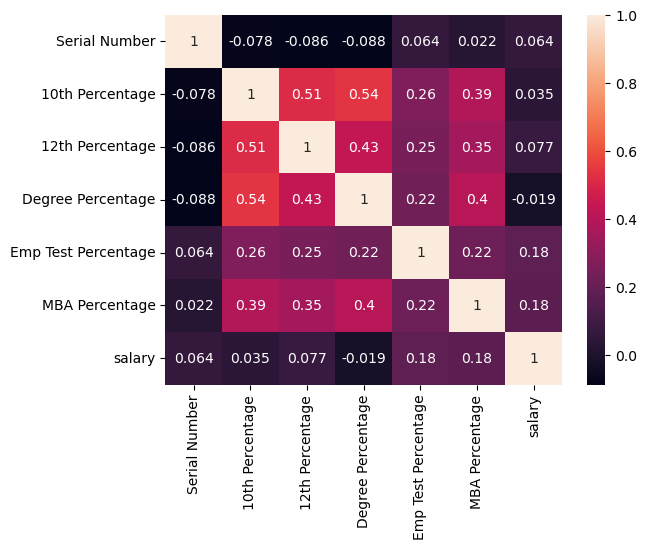

In [31]:
sns.heatmap(df.corr(numeric_only=True) , annot=True)

* Above Heatmap showing :-
* Ranges 0 to 0.4 represnting weak correlation which is shown by dark colour
* Ranges 0.4 to +1.0 respreseting strong Positive correlation which is shown by light colour

### 2. Feature Selection

In [32]:
df

,Serial Number,Gender,10th Percentage,10th Board,12th Percentage,12th Board,12th Specialization,Degree Percentage,Degree Specilization,Work Exp,Emp Test Percentage,specialisation,MBA Percentage,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [33]:
X = df.drop('status' , axis=1)
y = df['status']


In [34]:
categ_X = X.select_dtypes(include='object').columns

In [35]:
categ_X

Index(['Gender', '10th Board', '12th Board', '12th Specialization',
       'Degree Specilization', 'Work Exp', 'specialisation'],
      dtype='object')

In [36]:
ord = OrdinalEncoder()
ord.fit(X[categ_X])
X_categ = pd.DataFrame(ord.transform(X[categ_X]) , columns=ord.get_feature_names_out())
X_categ

,Gender,10th Board,12th Board,12th Specialization,Degree Specilization,Work Exp,specialisation
0,1.0,1.0,1.0,1.0,2.0,0.0,1.0
1,1.0,0.0,1.0,2.0,2.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,2.0,2.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
210,1.0,1.0,1.0,1.0,0.0,0.0,0.0
211,1.0,1.0,1.0,2.0,2.0,0.0,0.0
212,1.0,1.0,1.0,1.0,0.0,1.0,0.0
213,0.0,1.0,1.0,1.0,0.0,0.0,1.0


In [37]:
X_num = X.select_dtypes(exclude='object')
X_num

,Serial Number,10th Percentage,12th Percentage,Degree Percentage,Emp Test Percentage,MBA Percentage,salary
0,1,67.00,91.00,58.00,55.0,58.80,270000.0
1,2,79.33,78.33,77.48,86.5,66.28,200000.0
2,3,65.00,68.00,64.00,75.0,57.80,250000.0
3,4,56.00,52.00,52.00,66.0,59.43,NaN
4,5,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0
211,212,58.00,60.00,72.00,74.0,53.62,275000.0
212,213,67.00,67.00,73.00,59.0,69.72,295000.0
213,214,74.00,66.00,58.00,70.0,60.23,204000.0


**Feature Selection for Inputs**

In [38]:
X = pd.concat([X_num , X_categ] , axis=1)
X

,Serial Number,10th Percentage,12th Percentage,Degree Percentage,Emp Test Percentage,MBA Percentage,salary,Gender,10th Board,12th Board,12th Specialization,Degree Specilization,Work Exp,specialisation
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,1.0,0.0,1.0,2.0,2.0,1.0,0.0
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,56.00,52.00,52.00,66.0,59.43,NaN,1.0,0.0,0.0,2.0,2.0,0.0,1.0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
211,212,58.00,60.00,72.00,74.0,53.62,275000.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0
212,213,67.00,67.00,73.00,59.0,69.72,295000.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
213,214,74.00,66.00,58.00,70.0,60.23,204000.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


In [39]:
X

,Serial Number,10th Percentage,12th Percentage,Degree Percentage,Emp Test Percentage,MBA Percentage,salary,Gender,10th Board,12th Board,12th Specialization,Degree Specilization,Work Exp,specialisation
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,1.0,0.0,1.0,2.0,2.0,1.0,0.0
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,56.00,52.00,52.00,66.0,59.43,NaN,1.0,0.0,0.0,2.0,2.0,0.0,1.0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
211,212,58.00,60.00,72.00,74.0,53.62,275000.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0
212,213,67.00,67.00,73.00,59.0,69.72,295000.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
213,214,74.00,66.00,58.00,70.0,60.23,204000.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


In [40]:
best = SelectKBest(chi2 , k=3)
pd.DataFrame(best.fit_transform(X_categ, y) , columns=best.get_feature_names_out())

,Gender,Work Exp,specialisation
0,1.0,0.0,1.0
1,1.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,1.0
4,1.0,0.0,0.0
...,...,...,...
210,1.0,0.0,0.0
211,1.0,0.0,0.0
212,1.0,1.0,0.0
213,0.0,0.0,1.0


In [41]:
impute = SimpleImputer(strategy='median')
X_num[['salary']] = impute.fit_transform(X_num[['salary']])


In [42]:
cat_col = ['10th Board' , '12th Board' , '12th Specialization' , 'Degree Specilization' , 'Serial Number']

df.drop(cat_col,axis=1,inplace=True)
df

,Gender,10th Percentage,12th Percentage,Degree Percentage,Work Exp,Emp Test Percentage,specialisation,MBA Percentage,status,salary
0,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,77.60,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,60.00,72.00,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,67.00,73.00,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,66.00,58.00,No,70.0,Mkt&HR,60.23,Placed,204000.0


**Feature Selection for Inputs and Outputs**

In [43]:
X_num

,Serial Number,10th Percentage,12th Percentage,Degree Percentage,Emp Test Percentage,MBA Percentage,salary
0,1,67.00,91.00,58.00,55.0,58.80,270000.0
1,2,79.33,78.33,77.48,86.5,66.28,200000.0
2,3,65.00,68.00,64.00,75.0,57.80,250000.0
3,4,56.00,52.00,52.00,66.0,59.43,265000.0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0
211,212,58.00,60.00,72.00,74.0,53.62,275000.0
212,213,67.00,67.00,73.00,59.0,69.72,295000.0
213,214,74.00,66.00,58.00,70.0,60.23,204000.0


In [44]:
from sklearn.feature_selection import chi2,f_classif,f_regression,SelectKBest
better = SelectKBest(f_classif,k=3)
pd.DataFrame(better.fit_transform(X_num,y),columns=better.get_feature_names_out())

,10th Percentage,12th Percentage,Degree Percentage
0,67.00,91.00,58.00
1,79.33,78.33,77.48
2,65.00,68.00,64.00
3,56.00,52.00,52.00
4,85.80,73.60,73.30
...,...,...,...
210,80.60,82.00,77.60
211,58.00,60.00,72.00
212,67.00,67.00,73.00
213,74.00,66.00,58.00


In [45]:
num_col = ['Emp Test Percentage' , 'MBA Percentage' , 'salary']

df.drop(num_col , axis=1 , inplace=True)

**Main Dataframe after feature selection, which will use in ML model**

In [46]:
df

,Gender,10th Percentage,12th Percentage,Degree Percentage,Work Exp,specialisation,status
0,M,67.00,91.00,58.00,No,Mkt&HR,Placed
1,M,79.33,78.33,77.48,Yes,Mkt&Fin,Placed
2,M,65.00,68.00,64.00,No,Mkt&Fin,Placed
3,M,56.00,52.00,52.00,No,Mkt&HR,Not Placed
4,M,85.80,73.60,73.30,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...
210,M,80.60,82.00,77.60,No,Mkt&Fin,Placed
211,M,58.00,60.00,72.00,No,Mkt&Fin,Placed
212,M,67.00,67.00,73.00,Yes,Mkt&Fin,Placed
213,F,74.00,66.00,58.00,No,Mkt&HR,Placed


### 3. Data Cleaning

**Splitting the Data**

In [47]:
X = df.drop('status' , axis=1)
y = df['status']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [48]:
X_train  

,Gender,10th Percentage,12th Percentage,Degree Percentage,Work Exp,specialisation
93,M,52.00,62.0,54.0,No,Mkt&HR
84,M,70.00,63.0,70.0,Yes,Mkt&Fin
95,M,73.00,78.0,65.0,Yes,Mkt&Fin
137,M,67.00,63.0,72.0,No,Mkt&HR
210,M,80.60,82.0,77.6,No,Mkt&Fin
...,...,...,...,...,...,...
106,M,61.08,50.0,54.0,No,Mkt&Fin
14,M,62.00,47.0,50.0,No,Mkt&HR
92,F,60.23,69.0,66.0,No,Mkt&Fin
179,F,77.80,64.0,64.2,No,Mkt&HR


In [49]:
cat_col = X_train.select_dtypes(include='object').columns
num_col = X_train.select_dtypes(exclude='object').columns

In [50]:
lab = LabelEncoder()
lab.fit(y_train)
y_train = lab.transform(y_train)
y_test = lab.transform(y_test)

In [51]:
categorical_features = ['Gender', 'Work Exp', 'specialisation']


cat_transformer = OrdinalEncoder()  # Use OrdinalEncoder directly


num_transformer = Pipeline(steps=[('Scaling', StandardScaler())])

preprocessing = ColumnTransformer([('step1', cat_transformer, cat_col),
                                 ('step2', num_transformer, num_col)],
                                remainder='passthrough')

pipe = Pipeline([('Preprocessing', preprocessing),
                 ('Classification', MixedNB())])

pipe


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1', OrdinalEncoder(),
                                                  Index(['Gender', 'Work Exp', 'specialisation'], dtype='object')),
                                                 ('step2',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler())]),
                                                  Index(['10th Percentage', '12th Percentage', 'Degree Percentage'], dtype='object'))])),
                ('Classification', MixedNB(alpha=0.5, var_smoothing=1e-09))])

In [53]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1', OrdinalEncoder(),
                                                  Index(['Gender', 'Work Exp', 'specialisation'], dtype='object')),
                                                 ('step2',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler())]),
                                                  Index(['10th Percentage', '12th Percentage', 'Degree Percentage'], dtype='object'))])),
                ('Classification', MixedNB(alpha=0.5, var_smoothing=1e-09))])

In [54]:
y_pred = pipe.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

### 5. Model Evaluation

In [55]:
confusion_matrix(y_test , y_pred)

array([[ 7,  5],
       [ 4, 27]], dtype=int64)

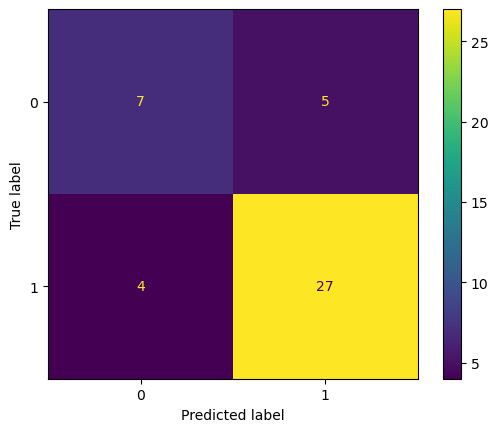

In [56]:
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred)).plot()

In [57]:
print("Accuracy Score  :- " , accuracy_score(y_test , y_pred))
print("Precision Score :- " , precision_score(y_test , y_pred))
print("Recal Score     :- " , recall_score(y_test , y_pred))
print("F-1 Score       :- " , f1_score(y_test , y_pred))

Accuracy Score  :-  0.7906976744186046
Precision Score :-  0.84375
Recal Score     :-  0.8709677419354839
F-1 Score       :-  0.8571428571428571


In [58]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.84      0.87      0.86        31

    accuracy                           0.79        43
   macro avg       0.74      0.73      0.73        43
weighted avg       0.79      0.79      0.79        43



In [107]:
import pickle
pickle.dump(pipe , open("Placement.pkl" , "wb"))